# Steps to solve Emergency vs Non-Emergency vehicle classification problem using Dropout

<ol>1. Loading the dataset</ol>
<ol>2. Pre-processing the data</ol>
<ol>3. Creating training and validation set</ol>
<ol>4. Defining the model architecture</ol>
<ol> <ol>* Adding dropout layer(s) </ol></ol>
<ol>5. Compiling the model</ol>
<ol>6. Training the model using Dropout</ol>
<ol>7. Evaluating model performance</ol>

## 1. Loading the dataset

In [25]:
# import necessary libraries and functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# importing layers from keras
from keras.layers import Dense, InputLayer
from keras.models import Sequential
# importing adam optimizer from keras optimizer module 
from keras.optimizers import Adam

# train_test_split to create training and validation set
from sklearn.model_selection import train_test_split
# accuracy_score to calculate the accuracy of predictions
from sklearn.metrics import accuracy_score

In [26]:
# reading the csv file
data = pd.read_csv('Dataset/emergency_classification.csv')

In [27]:
# create random number generator
seed = 42
rng = np.random.RandomState(seed)

In [28]:
# looking at first five rows of the data
data.head()

,image_names,emergency_or_not
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


In [29]:
# load images and store it in numpy array

# empty list to store the images
X = []
# iterating over each image
for img_name in data.image_names:
    # loading the image using its name
    img = plt.imread('Dataset/images/' + img_name)
    # saving each image in the list
    X.append(img)
    
# converting the list of images into array
X=np.array(X)

# storing the target variable in separate variable
y = data.emergency_or_not.values

## 2. Pre-processing the data

In [30]:
# converting 3 dimensional image to 1 dimensional image
X = X.reshape(X.shape[0], 224*224*3)
X.shape

(2352, 150528)

In [42]:
# normalizing the pixel values
X = X / X.max()

# minimum and maximum pixel values of images after normalizing
#X.min(), X.max()

MemoryError: Unable to allocate 2.64 GiB for an array with shape (2352, 150528) and data type float64

## 3. Creating training and validation set

In [32]:
# creating a training and validation set
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3, random_state=seed)

In [33]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

(((1646, 150528), (1646,)), ((706, 150528), (706,)))

## 4. Defining the model architecture

### <ol>Adding dropout layer(s)</ol>

In [34]:
# importing the dropout layer
from keras.layers import Dropout

In [35]:
# defining the model architecture with dropout layer
model=Sequential()

model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dropout(rate=0.5))
model.add(Dense(100, activation='sigmoid'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=1, activation='sigmoid'))

## 5. Compiling the model

In [36]:
# defining the adam optimizer and setting the learning rate as 10^-5
adam = Adam(lr=1e-5)

In [37]:
# compiling the model

# defining loss as binary crossentropy
# defining optimizer as Adam
# defining metrics as accuracy

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

## 6. Training the model using Dropout

In [38]:
# training the model for 100 epochs

model_history = model.fit(X_train, y_train, epochs=100, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/100
13/13 [==============================] - 2s 171ms/step - loss: 0.7658 - accuracy: 0.5614 - val_loss: 0.7407 - val_accuracy: 0.5609
Epoch 2/100
13/13 [==============================] - 2s 154ms/step - loss: 0.7795 - accuracy: 0.5705 - val_loss: 0.7286 - val_accuracy: 0.5609
Epoch 3/100
13/13 [==============================] - 2s 166ms/step - loss: 0.7751 - accuracy: 0.5589 - val_loss: 0.7262 - val_accuracy: 0.5609
Epoch 4/100
13/13 [==============================] - 2s 182ms/step - loss: 0.7688 - accuracy: 0.5571 - val_loss: 0.7241 - val_accuracy: 0.5609
Epoch 5/100
13/13 [==============================] - 2s 171ms/step - loss: 0.7760 - accuracy: 0.5656 - val_loss: 0.7217 - val_accuracy: 0.5609
Epoch 6/100
13/13 [==============================] - 2s 179ms/step - loss: 0.7546 - accuracy: 0.5644 - val_loss: 0.7194 - val_accuracy: 0.5609
Epoch 7/100
13/13 [==============================] - 2s 176ms/step - loss: 0.7736 - accuracy: 0.5504 - val_loss: 0.7176 - val_accuracy: 0.5609

Epoch 58/100
13/13 [==============================] - 3s 221ms/step - loss: 0.7525 - accuracy: 0.5164 - val_loss: 0.6882 - val_accuracy: 0.5609
Epoch 59/100
13/13 [==============================] - 3s 222ms/step - loss: 0.7400 - accuracy: 0.5401 - val_loss: 0.6882 - val_accuracy: 0.5609
Epoch 60/100
13/13 [==============================] - 3s 229ms/step - loss: 0.7169 - accuracy: 0.5559 - val_loss: 0.6882 - val_accuracy: 0.5609
Epoch 61/100
13/13 [==============================] - 3s 229ms/step - loss: 0.7523 - accuracy: 0.5286 - val_loss: 0.6881 - val_accuracy: 0.5609
Epoch 62/100
13/13 [==============================] - 3s 235ms/step - loss: 0.7232 - accuracy: 0.5389 - val_loss: 0.6881 - val_accuracy: 0.5609
Epoch 63/100
13/13 [==============================] - 2s 185ms/step - loss: 0.7421 - accuracy: 0.5340 - val_loss: 0.6880 - val_accuracy: 0.5609
Epoch 64/100
13/13 [==============================] - 2s 176ms/step - loss: 0.7437 - accuracy: 0.5298 - val_loss: 0.6880 - val_accuracy:

## 7. Evaluating model performance 

In [39]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)[:, 0]), '%')

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Accuracy on validation set: 0.5609065155807366 %


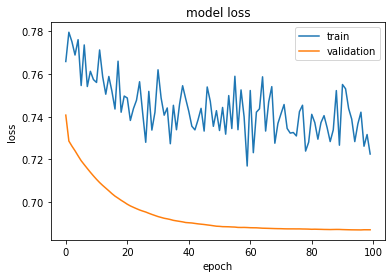

In [41]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()